In [1]:
import openpyxl
import numpy as np
import sys
sys.path.append('../')  
from DE import DifferentialEvolution
from PSO import ParticleSwarmOptimizer
import matplotlib.pyplot as plt

In [35]:
def plot_fitness(best_fitnesses):
    plt.figure()
    plt.plot(np.arange(len(best_fitnesses)), best_fitnesses, label='Best Fitness')
    plt.xlabel('Generation')
    plt.ylabel('Fitness')
    plt.title('Evolution of Best Fitness')
    plt.legend()
    plt.grid(True)
    plt.show()

In [2]:
workbook = openpyxl.load_workbook('DataRegression.xlsx')
sheets_to_extract = ['Var01', 'Var09', 'Var18']

data = {}


for sheet_name in sheets_to_extract:
    sheet = workbook[sheet_name]
    sheet_data = []
    for row in sheet.iter_rows(values_only=True):
        sheet_data.append(row)
    data[sheet_name] = sheet_data

workbook.close()

In [3]:

var01_data = data['Var01']
var09_data = data['Var09']
var18_data = data['Var18']

var01_x_values = [row[1] for row in var01_data if row[0] is not None][1:]  
var01_y_values = [row[0] for row in var01_data if row[0] is not None][1:]   

var09_x_values = [row[1] for row in var09_data if row[0] is not None][1:] 
var09_y_values = [row[0] for row in var09_data if row[0] is not None][1:] 

var18_x_values = [row[1] for row in var18_data if row[0] is not None][1:] 
var18_y_values = [row[0] for row in var18_data if row[0] is not None][1:] 

print("Var01 x values:", var01_x_values)
print("Var01 y values:", var01_y_values)
print()
print("Var09 x values:", var09_x_values)
print("Var09 y values:", var09_y_values)
print()
print("Var18 x values:", var18_x_values)
print("Var18 y values:", var18_y_values)


Var01 x values: [77.6, 114.9, 141.1, 190.8, 239.9, 289, 332.8, 378.4, 434.8, 477.3, 536.8, 593.1, 689.1, 760]
Var01 y values: [10.07, 14.73, 17.94, 23.93, 29.61, 35.18, 40.02, 44.82, 50.76, 55.05, 61.01, 66.4, 75.47, 81.78]

Var09 x values: [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320]
Var09 y values: [0.844, 0.908, 0.932, 0.936, 0.925, 0.908, 0.881, 0.85, 0.818, 0.784, 0.751, 0.718, 0.685, 0.658, 0.628, 0.603, 0.58, 0.558, 0.538, 0.522, 0.506, 0.49, 0.478, 0.467, 0.457, 0.448, 0.438, 0.431, 0.424, 0.42, 0.414, 0.411, 0.406]

Var18 x values: [7.447168, 8.102586, 8.452547, 8.711278, 8.916774, 9.087155, 9.23259, 9.359535, 9.472166, 9.573384, 9.665293, 9.749461, 9.827092, 9.899128, 9.966321, 10.02928, 10.08851, 10.14443, 10.19738, 10.24767, 10.29556, 10.34125, 10.38495, 10.42682, 10.467, 10.50564, 10.54283, 10.57869, 10.61331, 10.64678, 10.67915, 10.71052, 10.74092, 10.77044, 10.79

Best solution (b1, b2): [1.00000000e+02 1.70090029e-03]
Best fitness: 224.84572994363785


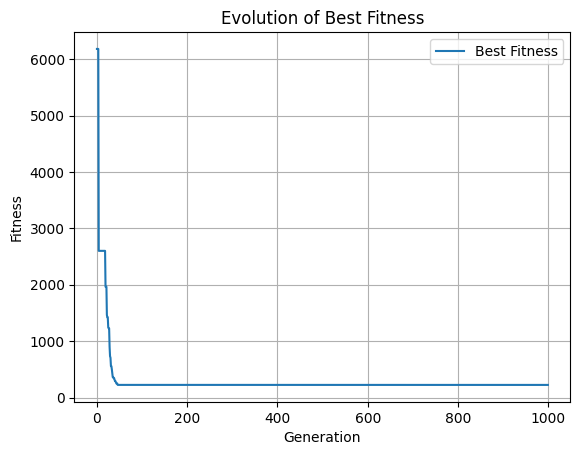

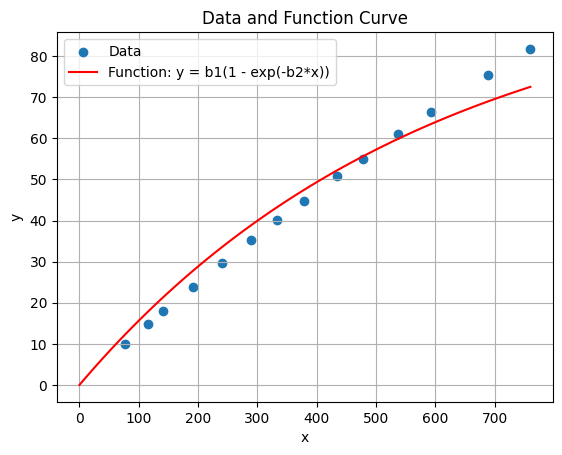

In [6]:
def objective_function(params):
    b1, b2 = params
    return sum([(var01_y_values[i] - b1*(1-np.exp(-b2*var01_x_values[i])))**2 for i in range(len(var01_x_values))])

def func(x, b1, b2):
    return b1 * (1 - np.exp(-b2 * x))

bounds = np.array([[0, 100], [0, 1]])

de = DifferentialEvolution(objective_function=objective_function, bounds=bounds)

best_solution, best_fitness = de.fit()
print("Best solution (b1, b2):", best_solution)
print("Best fitness:", best_fitness)

de.plot_fitness()



b1, b2 = best_solution[0], best_solution[1]

x_values = np.linspace(0, max(var01_x_values), 100)
y_values_func = func(x_values, b1, b2)

plt.scatter(var01_x_values, var01_y_values, label='Data')
plt.plot(x_values, y_values_func, color='red', label='Function: y = b1(1 - exp(-b2*x))')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data and Function Curve')
plt.legend()
plt.grid(True)
plt.show()

/var/folders/kl/jfwvxx3s68qd0pvk126hj5w40000gn/T/ipykernel_11746/1617832889.py:3: RuntimeWarning: overflow encountered in scalar power
  return sum([(var09_y_values[i] - (b1 + b2*np.exp(-var09_x_values[i]*b4) + b3*np.exp(-var09_x_values[i]*b5)))**2 for i in range(len(var09_x_values))])


Best solution (b1, b2): [ 0.35192787  1.13645235 -0.64559006  0.00984927  0.03069193]
Best fitness: 0.00032799910401299585


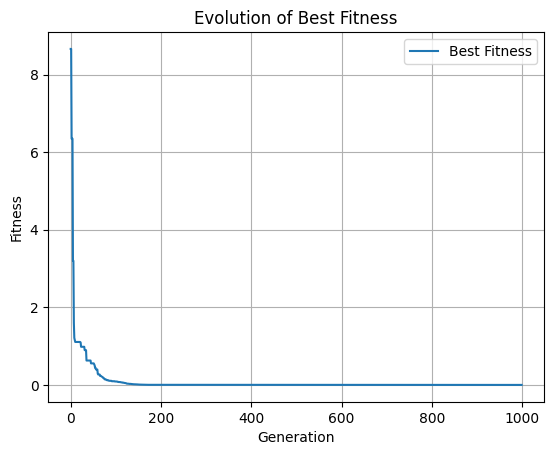

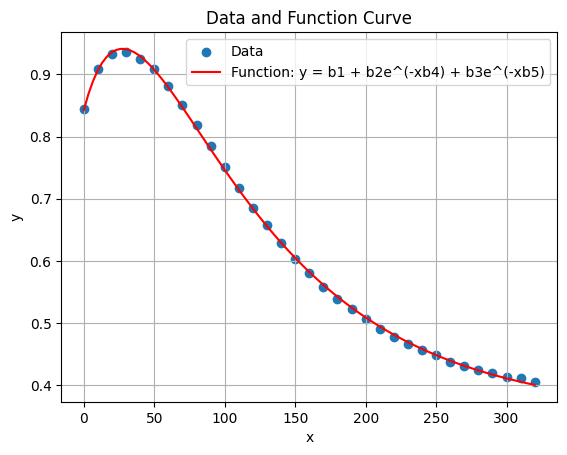

In [7]:
def objective_function(params):
    b1, b2, b3, b4, b5 = params
    return sum([(var09_y_values[i] - (b1 + b2*np.exp(-var09_x_values[i]*b4) + b3*np.exp(-var09_x_values[i]*b5)))**2 for i in range(len(var09_x_values))])

def func(x, b1, b2, b3, b4, b5):
    return b1 + b2 * np.exp(-x * b4) + b3 * np.exp(-x * b5)

bounds = np.array([[0, 10], [0, 5], [-2, 2], [-2, 2], [-2, 2]])

de = DifferentialEvolution(objective_function=objective_function, bounds=bounds)

best_solution, best_fitness = de.fit()
print("Best solution (b1, b2):", best_solution)
print("Best fitness:", best_fitness)

de.plot_fitness()


b1 = best_solution[0]
b2 = best_solution[1]
b3 = best_solution[2]
b4 = best_solution[3]
b5 = best_solution[4]

x_values = np.linspace(0, max(var09_x_values), 100)

y_values_func = func(x_values, b1, b2, b3, b4, b5)

plt.scatter(var09_x_values, var09_y_values, label='Data')
plt.plot(x_values, y_values_func, color='red', label='Function: y = b1 + b2e^(-xb4) + b3e^(-xb5)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data and Function Curve')
plt.legend()
plt.grid(True)
plt.show()



/var/folders/kl/jfwvxx3s68qd0pvk126hj5w40000gn/T/ipykernel_25294/1340592308.py:3: RuntimeWarning: divide by zero encountered in scalar divide
  return sum([(var18_y_values[i] - b1*pow(b2+var18_x_values[i], -1/b3))**2 for i in range(len(var09_x_values))])


Best solution (b1, b2): [-5.19261547e+03  5.41786715e+01  8.23476436e-01]
Best fitness: 0.00018976125214022814


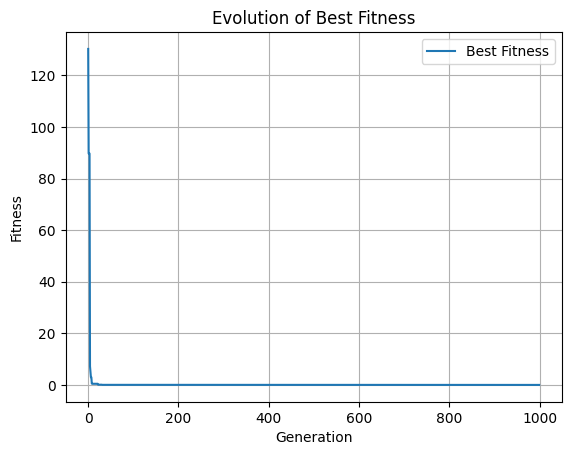

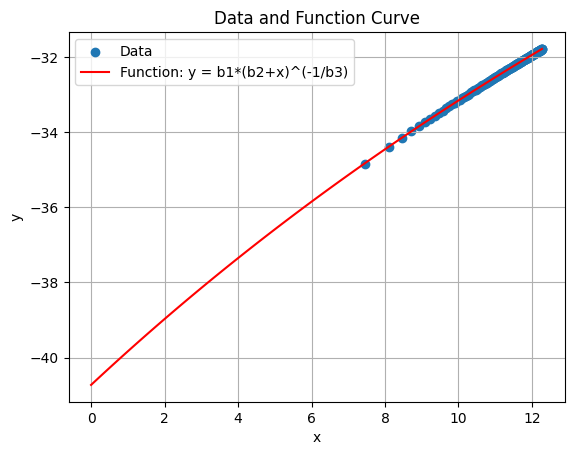

In [26]:
def objective_function(params):
    b1, b2, b3 = params
    return sum([(var18_y_values[i] - b1*pow(b2+var18_x_values[i], -1/b3))**2 for i in range(len(var09_x_values))])

def func(x, b1, b2, b3):
    return b1*pow(b2+x, -1/b3)

bounds = np.array([[-10000, -1000], [1, 100], [0, 1]])

de = DifferentialEvolution(objective_function=objective_function, bounds=bounds)

best_solution, best_fitness = de.fit()
print("Best solution (b1, b2):", best_solution)
print("Best fitness:", best_fitness)

de.plot_fitness()


b1 = best_solution[0]
b2 = best_solution[1]
b3 = best_solution[2]

x_values = np.linspace(0, max(var18_x_values), 100)

y_values_func = func(x_values, b1, b2, b3)

plt.scatter(var18_x_values, var18_y_values, label='Data')
plt.plot(x_values, y_values_func, color='red', label='Function: y = b1*(b2+x)^(-1/b3)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data and Function Curve')
plt.legend()
plt.grid(True)
plt.show()


[75.60790264199377, 0.001502394829366871]


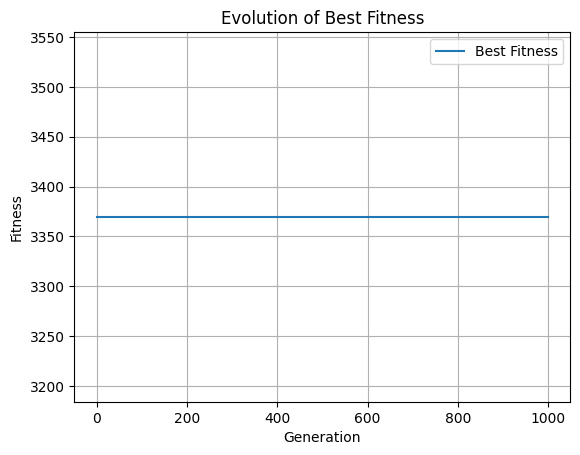

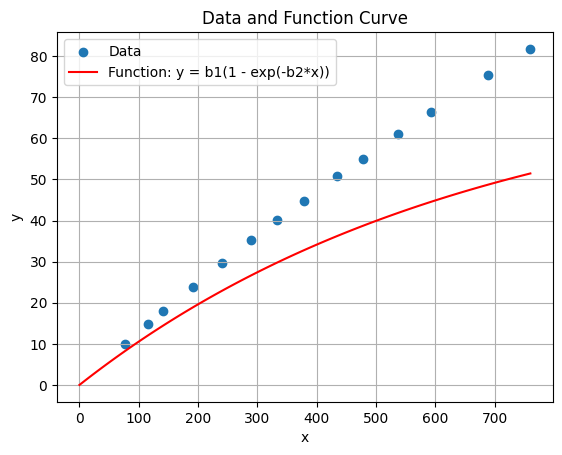

In [117]:
def objective_function(b1, b2):
    return sum([(var01_y_values[i] - b1*(1-np.exp(-b2*var01_x_values[i])))**2 for i in range(len(var01_x_values))])

def func(x, b1, b2):
    return b1 * (1 - np.exp(-b2 * x))

bounds = np.array([[0, 100], [0, 1]])

PSO = ParticleSwarmOptimizer(objective_function, [0, 0], [100, 1], [1, 1], [10, 10], epochs=1000, population_size=20, dimensions=2, alpha1=0.1, alpha2=3.5)
sol = PSO.fit()
print(sol)

plot_fitness(PSO._meta["best_fitness"])

b1 = sol[0]
b2 = sol[1]


x_values = np.linspace(0, max(var01_x_values), 100)
y_values_func = func(x_values, b1, b2)

plt.scatter(var01_x_values, var01_y_values, label='Data')
plt.plot(x_values, y_values_func, color='red', label='Function: y = b1(1 - exp(-b2*x))')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data and Function Curve')
plt.legend()
plt.grid(True)
plt.show()

/var/folders/kl/jfwvxx3s68qd0pvk126hj5w40000gn/T/ipykernel_25294/3713625152.py:2: RuntimeWarning: overflow encountered in scalar power
  return sum([(var09_y_values[i] - (b1 + b2*np.exp(-var09_x_values[i]*b4) + b3*np.exp(-var09_x_values[i]*b5)))**2 for i in range(len(var09_x_values))])


[0.6057567883716974, 1.0918724899785355, -0.44663293263198467, 0.9476933960668168, 1.1241814678228694]


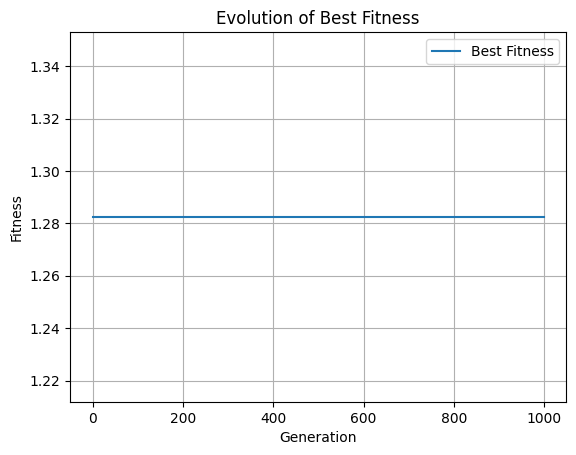

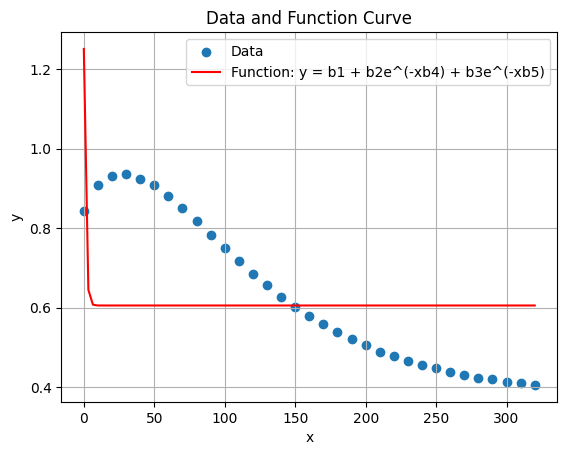

In [124]:
def objective_function(b1, b2, b3, b4, b5):
    return sum([(var09_y_values[i] - (b1 + b2*np.exp(-var09_x_values[i]*b4) + b3*np.exp(-var09_x_values[i]*b5)))**2 for i in range(len(var09_x_values))])

def func(x, b1, b2, b3, b4, b5):
    return b1 + b2 * np.exp(-x * b4) + b3 * np.exp(-x * b5)

bounds = np.array([[0, 10], [0, 5], [-2, 2], [-2, 2], [-2, 2]])


PSO = ParticleSwarmOptimizer(objective_function, [0, 0, -2, -2, -2], [10, 5, 2, 2, 2], [1, 1, 1, 1, 1], [50, 50, 50, 50, 50], epochs=1000, population_size=20, dimensions=5, alpha1=0.5, alpha2=3.2)
sol = PSO.fit()
print(sol)

plot_fitness(PSO._meta["best_fitness"])

b1 = sol[0]
b2 = sol[1]
b3 = sol[2]
b4 = sol[3]
b5 = sol[4]

x_values = np.linspace(0, max(var09_x_values), 100)

y_values_func = func(x_values, b1, b2, b3, b4, b5)

plt.scatter(var09_x_values, var09_y_values, label='Data')
plt.plot(x_values, y_values_func, color='red', label='Function: y = b1 + b2e^(-xb4) + b3e^(-xb5)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data and Function Curve')
plt.legend()
plt.grid(True)
plt.show()

[-1000.0, 47.65805176602987, 1.1877643878901982]


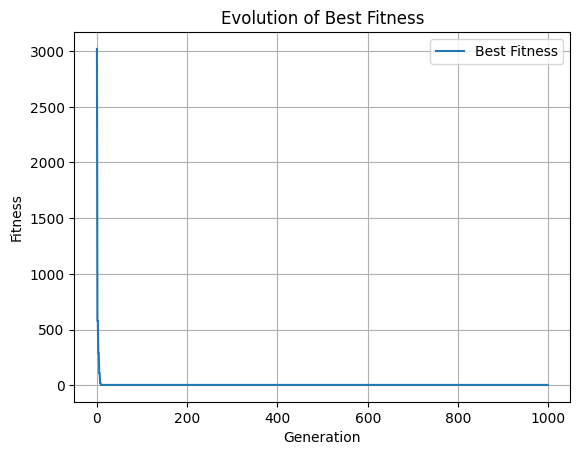

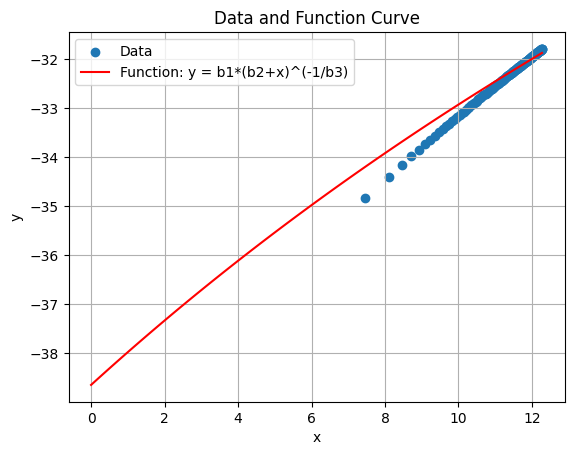

In [86]:
def objective_function(b1, b2, b3):
    return sum([(var18_y_values[i] - b1*pow(b2+var18_x_values[i], -1/b3))**2 for i in range(len(var09_x_values))])

def func(x, b1, b2, b3):
    return b1*pow(b2+x, -1/b3)

PSO = ParticleSwarmOptimizer(objective_function, [-1000, 1, 0], [-1000, 100, 1], [1, 1, 1], [10, 10, 10], epochs=1000, population_size=20, dimensions=3, alpha1=0.5, alpha2=2)
sol = PSO.fit()
print(sol)

plot_fitness(PSO._meta["best_fitness"])

b1 = sol[0]
b2 = sol[1]
b3 = sol[2]

x_values = np.linspace(0, max(var18_x_values), 100)

y_values_func = func(x_values, b1, b2, b3)

plt.scatter(var18_x_values, var18_y_values, label='Data')
plt.plot(x_values, y_values_func, color='red', label='Function: y = b1*(b2+x)^(-1/b3)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data and Function Curve')
plt.legend()
plt.grid(True)
plt.show()